<a href="https://colab.research.google.com/github/amarathe/ELEN521_labs/blob/master/Lab7_032020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras

# install gensim
!pip install gensim --upgrade
#   conda install gensim

import gensim.downloader as api

wv = api.load("word2vec-google-news-300")

king = wv["king"]

print(king.shape)

print(wv.most_similar(positive=["king", "queen"], topn=10))

print(wv.similarity("king", "queen" ))

print(wv.most_similar(positive=["man", "rule"], negative=["woman"]))

# What happened here?
# 
# Do some research on how to resolve this problem. A few sites you may 
# want to look at are:
# 
# https://cacm.acm.org/videos/2018/6
#
# Ricardo Baeza-Yates and Jeanna Neefe Matthews,
# Handling Web Bias 2019: Chairs' Welcome and Workshop Summary,
# Communications of the ACM
# 
# https://arxiv.org/pdf/1906.08976.pdf


     |████████████████████████████████| 24.2MB 34.8MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[=================================================-] 98.3% 1634.5/1662.8MB downloaded
(300,)
[('monarch', 0.7042065858840942), ('kings', 0.6780861020088196), ('princess', 0.6731551289558411), ('queens', 0.6679497957229614), ('prince', 0.6435247659683228), ('royal', 0.5985592603683472), ('princes', 0.5942345261573792), ('crown_prince', 0.5906674265861511), ('NYC_anglophiles_aflutter', 0.5811060070991516), ('Queen_Consort', 0.5735104084014893)]
0.6510957
[('rules', 0.5407542586326599), ('ruled', 0.44207143783569336), ('Fifa_statutes', 0.4358542859554291), ('Rule', 0.42790597677230835), ('rulebook', 0.40312427282333374), ('Gensym_flagship_G2', 0.39585864543914795), ('unwritten_pact', 0.3956116735935211), ('edict', 0.3861566483974457), ('dictum', 0.3820774257183075), ('Bosman_Ruling', 0.37687504291534424)]


There is bias learned by the model due to the training data.  By learning stereotypes about a group from text, the model becomes inherently biased.  This bias can be counteracted by reducing the weights that contribute to the stereotypes, by flipping the polarity of loss function for predictions marked as incorrect

#7.2 IMDB dataset 

In [0]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import *
from keras import preprocessing
from keras.datasets import imdb
import keras
import numpy as np

max_features = 10000
maxlen = 100
embedded_size = 8

# Load imdb dataset and print a few samples to check.
#
# IMDB: sentence (x) -> positive/negative (y)
#
# “The food was really good” 				 -> pos
# “The chicken crossed the road because it was uncooked” -> neg

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# x_train has a size (training_size, ). Because the sentences have variable size,
# we cannot represent this in matrix format.

print(x_train.shape)

# The first step is to make the column size constant.
#
# We do that by "padding" the sentences. If the sentences are bigger, we clip them.
# If they are smaller, we insert a "NO_WORD" token to the sentence.

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print(x_train.shape)

# Let's see the first sentence

print(x_train[0])

# Input shape should be now (training_size, maxlen)

# Let's use an embedding to try to help to estimate 

xi = Input(x_train.shape[1:])

# Embedding input is (training_size, maxlen)
# Embedding output is (training_size, maxlen, embedded_size)

x = Embedding(max_features, embedded_size, input_length=maxlen)(xi)
x = Flatten()(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(inputs=xi, outputs=x)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(
        x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

p = model.predict(x_test)



17465344/17464789 [==============================] - 3s 0us/step
(25000,)
(25000, 100)
[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117 5952   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
 7486   18    4  226   22   21  134  476   26  480    5  144   30 5535
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16 5345   19
  178   32]





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding) 

Print out the first sentence in text

In [0]:
# From https://stackoverflow.com/questions/42821330/restore-original-text-from-keras-s-imdb-dataset
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3   # word index offset

train,test = keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)
train_x,train_y = train
test_x,test_y = test

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in train_x[0] ))

1646592/1641221 [==============================] - 1s 1us/step
<START> this film was just brilliant casting <UNK> <UNK> story direction <UNK> really <UNK> the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same <UNK> <UNK> as myself so i loved the fact there was a real <UNK> with this film the <UNK> <UNK> throughout the film were great it was just brilliant so much that i <UNK> the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the <UNK> <UNK> was amazing really <UNK> at the end it was so sad and you know what they say if you <UNK> at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of <UNK> and paul they were just brilliant children are often left out of the <UNK> <UNK> i think because the stars that play them all <UNK> up are such a big <UNK> for the whole film but these children a

In [0]:
#
# What's the current accuracy for this model?
# 
print ("Loss: %f, Accuracy: %f" % tuple(model.evaluate(x_test,y_test)))


25000/25000 [==============================] - 1s 41us/step
Loss: 0.765734, Accuracy: 0.829680


In [0]:
# Try to add a preloaded embedded from Glove from this model, see the
# suggestion in
# https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
# 
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip
!ls
!pwd
print('Indexing word vectors.')

import numpy as np
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))



#
# Also try Conv1D + MaxPooling1D to improve results
# https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.htm

--2020-03-19 22:25:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-19 22:25:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-19 22:25:18--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

# Question: why does this model may help you get better accuracy?


This model should give better accuracy because the embeddings have been pre-trained with the relationships between words.  So the IMDB predictor can leverage the relationships between words during training the final layer (trainable) of the model

In [0]:
from keras.layers import Embedding

def runembedding(printme=False, embedded_size=8, maxlen=100):
  print ("DEBUG: maxlen", maxlen)

  embedding_matrix = np.zeros((len(word_to_id) + 1, maxlen))
  for word, i in word_to_id.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all-zeros.
      print ("Embedding_vector:", embedding_vector)
      embedding_matrix[i] = embedding_vector

  max_features = 10000
  embedded_size = 8

  # Load imdb dataset and print a few samples to check.
  #
  # IMDB: sentence (x) -> positive/negative (y)
  #
  # “The food was really good” 				 -> pos
  # “The chicken crossed the road because it was uncooked” -> neg

  (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

  # x_train has a size (training_size, ). Because the sentences have variable size,
  # we cannot represent this in matrix format.

  print("Initial shape x_train:", x_train.shape)

  # The first step is to make the column size constant.
  #
  # We do that by "padding" the sentences. If the sentences are bigger, we clip them.
  # If they are smaller, we insert a "NO_WORD" token to the sentence.

  x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
  x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

  print("x_train shape:", x_train.shape)

  # Let's see the first sentence

  print(x_train[0])

  # Input shape should be now (training_size, maxlen)

  # Let's use an embedding to try to help to estimate 

  xi = Input(x_train.shape[1:])

  # Embedding input is (training_size, maxlen)
  # Embedding output is (training_size, maxlen, embedded_size)

  x = Embedding(max_features, embedded_size, input_length=maxlen)(xi)
  x = Flatten()(x)
  x = Dense(1, activation="sigmoid")(x)

  model = Model(inputs=xi, outputs=x)

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
  model.summary()

  history = model.fit(
        x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

  p = model.predict(x_test)

#print ("len(word_to_id)", len(word_to_id))
#print ("maxlen", maxlen)
  #print ("x_train.shape:", x_train.shape)
  xi = Input(x_train.shape[1:])


  embedding_layer = Embedding(max_features,
                            embedded_size,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)

  x = Embedding(max_features, embedded_size, input_length=maxlen)(xi)
  x = Flatten()(x)
  x = Dense(1, activation="sigmoid")(x)

#print ("sequence input")
#sequence_input = Input(shape=(maxlen,), dtype='int32')
#embedded_sequences = embedding_layer(sequence_input)
#print ("embedded done")
#x = Conv1D(128, 5, activation='relu')(embedded_sequences)
#print ("conv1 done")
#x = MaxPooling1D(5)(x)
#x = Conv1D(128, 5, activation='relu')(x)
#x = MaxPooling1D(5)(x)
#x = Conv1D(128, 5, activation='relu')(x)
#x = MaxPooling1D(35)(x)  # global max pooling
#x = Flatten()(x)
#x = Dense(128, activation='relu')(x)
#print ("dense")
#preds = Dense(len(labels_index), activation='softmax')(x)

#print ("building model")
  model = Model(xi, x)
#print ("model compile")
  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
  if printme: model.summary()

# happy learning!
#model.fit(x_train, y_train, validation_data=(x_val, y_val),
#          epochs=2, batch_size=128)

  history = model.fit(
        x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
  
  res = model.evaluate(x_test,y_test)
  if printme: print ("Loss: %f, Accuracy: %f" % tuple(res))
  return res[1]

In [0]:
runembedding(True);
#print ("Loss: %f, Accuracy: %f" % tuple(model.evaluate(x_test,y_test)))

(25000,)
(25000, 100)
[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117 5952   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
 7486   18    4  226   22   21  134  476   26  480    5  144   30 5535
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16 5345   19
  178   32]
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0

In [0]:
#Glove has fixed maxlen=100. To sweep maxlength run without glove
def runembeddingNOGLOVE(printme=False, embedded_size=8, maxlen=100):

  max_features = 10000

  # Load imdb dataset and print a few samples to check.
  #
  #IMDB: sentence (x) -> positive/negative (y)
  #
  # “The food was really good” 				 -> pos
  # “The chicken crossed the road because it was uncooked” -> neg

  (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

  # x_train has a size (training_size, ). Because the sentences have variable size,
  # we cannot represent this in matrix format.

  print(x_train.shape)

  # The first step is to make the column size constant.
  #
  # We do that by "padding" the sentences. If the sentences are bigger, we clip them.
  # If they are smaller, we insert a "NO_WORD" token to the sentence.

  x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
  x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

  print(x_train.shape)

  # Let's see the first sentence

  print(x_train[0])

  # Input shape should be now (training_size, maxlen)

  # Let's use an embedding to try to help to estimate 

  xi = Input(x_train.shape[1:])

  # Embedding input is (training_size, maxlen)
  # Embedding output is (training_size, maxlen, embedded_size)

  x = Embedding(max_features, embedded_size, input_length=maxlen)(xi)
  x = Flatten()(x)
  x = Dense(1, activation="sigmoid")(x)

  model = Model(inputs=xi, outputs=x)

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
  model.summary()

  history = model.fit(
        x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

  p = model.predict(x_test)
  res = model.evaluate(x_test,y_test)

  return res[1]

In [0]:
# Try to change the maxlen or the embedded_size and plot a 3D graph with
# embedded_size x maxlen x accuracy in a python jupyter notebook.

#NEED TO CHANGE INPUT LENGTH EVEN BEFORE MODEL

%matplotlib notebook
import numpy as np

embedded_size = [2, 4, 8, 12, 16]
maxlen = [25, 50, 100, 150, 200]

#print (x)

X, Y = np.meshgrid(embedded_size, maxlen)
Z = np.array((len(embedded_size), len(maxlen)))
Z = [[0 for _ in range(len(maxlen))] for y in range(len(embedded_size))]
#Z[0][0] = 1
for i, e in enumerate(embedded_size):
  for j, m in enumerate(maxlen):
    Z[i][j] = runembeddingNOGLOVE(False, e, m)

#Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('embedded_size')
ax.set_ylabel('maxlen')
ax.set_zlabel('z');

(25000,)
(25000, 25)
[  92   25  104    4  226   65   16   38 1334   88   12   16  283    5
   16 4472  113  103   32   15   16 5345   19  178   32]
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 25)                0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 25, 2)             20000     
_________________________________________________________________
flatten_8 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 20,051
Trainable params: 20,051
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] 

NameError: ignored

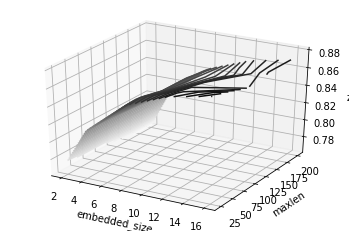

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
X, Y = np.meshgrid(embedded_size, maxlen)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('embedded_size')
ax.set_ylabel('maxlen')
ax.set_zlabel('z');


# Lab7.3 LSTM for IMDB positive/negative

In [0]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import *
from keras import preprocessing
from keras.datasets import imdb

max_features = 10000
maxlen = 100
embedded_size = 20
epochs = 3

def runLSTM(printme=False, embedded_size=embedded_size, maxlen=maxlen, epochs=epochs):

  # Load imdb dataset and print a few samples to check.
  #
  # IMDB: sentence (x) -> positive/negative (y)
  #
  # “The food was really good” 				 -> pos
  # “The chicken crossed the road because it was uncooked” -> neg

  (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

  # x_train has a size (training_size, ). Because the sentences have variable size,
  # we cannot represent this in matrix format.

  if printme: print(x_train.shape)

  # The first step is to make the column size constant.
  #
  # We do that by "padding" the sentences. If the sentences are bigger, we clip them.
  # If they are smaller, we insert a "NO_WORD" token to the sentence.

  x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
  x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

  if printme: print(x_train.shape)

  # Let's see the first sentence

  if printme: print(x_train[0])

  # Input shape should be now (training_size, maxlen)

  # Let's use an embedding to try to help to estimate 

  xi = Input(x_train.shape[1:])

  # Embedding input is (training_size, maxlen)
  # Embedding output is (training_size, maxlen, embedded_size)

  x = Embedding(max_features, embedded_size, input_length=maxlen)(xi)

  # Using LSTM to classify sentence as positive or negative
  #
  # “The chicken crossed the road because it was uncooked”
  #
  # h0 -> The 		-> h1
  # h1 -> chicken 	-> h2
  # h2 -> crossed 	-> h3
  # h3 -> the 		-> h4
  # h4 -> road		-> h5
  # h5 -> because		-> h6
  # h6 -> it		-> h7
  # h7 -> was		-> h8
  # h8 -> uncooked	-> h9
  # h9 -> pos

  # return_sequences: Boolean. Whether to return the last output in the output
  #     sequence, or the full sequence.

  # return_state: Boolean. Whether to return the last state in addition to the
  #     output. The returned elements of the states list are the hidden state
  #     and the cell state, respectively.

  #
  # What's the difference between return_sequences and return_state?
  #

  x = LSTM(32)(x)

  #
  # Try to get accuracy on validation set over 90%.
  #

  x = Dense(1, activation="sigmoid")(x)

  model = Model(inputs=xi, outputs=x)

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
  model.summary()

  history = model.fit(
        x_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2)

  p = model.predict(x_test)
  if printme: print ("Loss: %f, Accuracy: %f" % tuple(p))


  #Return accuracy
  res = model.evaluate(x_test,y_test)
  return res[1]

In [0]:
  res = model.evaluate(x_test,y_test)
  print ("Loss: %f, Accuracy: %f" % tuple(res))
  # Try to change the maxlen or the embedded_size and plot a 3D grpah with
  # embedded_size x maxlen x accuracy in a python jupyter notebook.
  #

Loss: 0.432305, Accuracy: 0.831800


In [0]:
%matplotlib notebook
import numpy as np

embedded_size = [10, 20, 30]
maxlen = [50, 100, 150]

#print (x)

X, Y = np.meshgrid(embedded_size, maxlen)
Z = np.zeros((len(embedded_size), len(maxlen)))
print ("X:", X)
for i, e in enumerate(embedded_size):
  for j, m in enumerate(maxlen):
    Z[i][j] = runLSTM(False, e, m, 1)

#Z = f(X, Y)

X: [[10 20 30]
 [10 20 30]
 [10 20 30]]
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 50, 10)            100000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                5504      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 105,537
Trainable params: 105,537
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/1
25000/25000 [==============================] - 25s 1ms/step
Model: "model_6"
_________________________________________________________________
Layer (ty

NameError: ignored

Z [[0.81304 0.84408 0.84356]
 [0.81332 0.82816 0.861  ]
 [0.81344 0.85016 0.85392]]


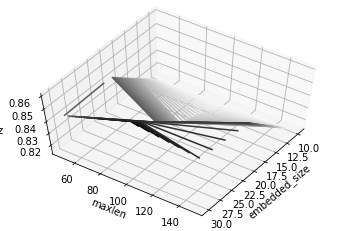

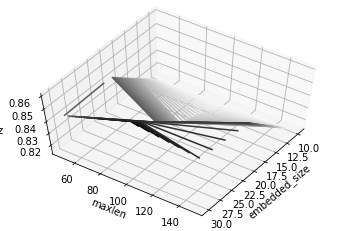

In [0]:
%matplotlib inline

print ("Z", Z)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('embedded_size')
ax.set_ylabel('maxlen')
ax.set_zlabel('z');

ax.view_init(60, 35)
fig

In [0]:
'''Example script to generate text from Nietzsche's writings.

At least 20 epochs are required before the generated text
starts sounding coherent.

It is recommended to run this script on GPU, as recurrent
networks are quite computationally intensive.

If you try this script on new data, make sure your corpus
has at least ~100k characters. ~1M is better.
'''

from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten, Input
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import GRU
from keras.optimizers import Adam
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys

path = get_file("nietzsche.txt",
        origin="https://s3.amazonaws.com/text-datasets/nietzsche.txt")

text = open(path).read().lower()
print("corpus length:", len(text))

chars = set(text)
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 100
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print("nb sequences:", len(sentences))

print("Vectorization...")
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


# build the model: 2 stacked LSTM
print("Build model...")
xi = Input((maxlen, len(chars)))
x = GRU(256, return_sequences=True)(xi)
x = Dropout(0.2)(x)
x = GRU(256, return_sequences=False)(x)
x = Dropout(0.2)(x)
x = Dense(len(chars))(x)
x = Activation("softmax")(x)

model = Model(inputs=xi, outputs=x)

model.summary()

adam = Adam(0.003)

model.compile(loss="categorical_crossentropy", optimizer=adam)


def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
    a = (np.log(a + 1e-8) / temperature).astype(np.float64)
    a = np.exp(a) / np.sum(np.exp(a))
    try:
      sample_result = np.argmax(np.random.multinomial(1, a, 1))
    except ValueError:
      error = 1.0 - np.sum(a)
      a[0] += error
      sample_result = np.argmax(np.random.multinomial(1, a, 1))
    return sample_result

# train the model, output generated text after each iteration
for iteration in range(1, 60):
    print()
    print("-" * 50)
    print("Iteration", iteration)

    model.fit(X, y, batch_size=4096, epochs=4)
    model.save_weights("weights.hdf5")

    start_index = random.randint(0, len(text) - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print("----- diversity:", diversity)

        generated = ""
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print("----- Generating with seed: '" + sentence + "'")
        sys.stdout.write(generated)

        for i in range(200):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            # predict next char
            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            # full sentence being generated
            generated += next_char

            # shift sentence
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()

            # let's consider only one sentence
            if next_char == ".":
              break
        print()



Using TensorFlow backend.


606208/600901 [==============================] - 0s 1us/step
corpus length: 600893
total chars: 57
nb sequences: 200265
Vectorization...
Build model...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 57)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100, 256)          241152    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 256)               393984    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)            

In [26]:
# Now you each group will perform the following tasks.
#
#   Part 1)
#
#   - Each group will pick up one set of data samples:
#     * assembly code (machine code z80, x86, ...)
#     * latex corpus
#     * html pages
#     * linux kernel source code (https://github.com/torvalds/linux)
#     * patents
#     * ...
#   - Modify the model to be trained in the corpus you chose
#   - Present the results
#  

#Get google's dataset of blog entries
import requests
#url = 'https://www.facebook.com/favicon.ico'
url = 'http://www.cs.biu.ac.il/~koppel/blogs/blogs.zip'
r = requests.get(url, allow_redirects=True)
open('blogs.zip', 'wb').write(r.content)
#r = requests.get(url, allow_redirects=True)
#open('facebook.ico', 'wb').write(r.content)

from zipfile import ZipFile
ZipFile.extractall(path='blogs.zip', members=None, pwd=None)

KeyboardInterrupt: ignored

In [0]:

# Create a ZipFile Object and load sample.zip in it
with ZipFile('blogs.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [1]:
#!ls blogs
#!cat blogs/862379.female.25.Science.Virgo.xml

from glob import glob
allxml = list(glob("blogs/*"))
print ("Number of xml files", len(allxml))

#for xmlfilename in allxml:
#  !sed -i '' 's/&//' $xmlfilename
#  !sed -i '' 's/$//' $xmlfilename
#  !sed -i '' 's/^//' $xmlfilename


from lxml import etree
import lxml
import re
fname = "blogs/862379.female.25.Science.Virgo.xml"
from io import StringIO, BytesIO

#Take subset of blog entries, too many will crash colab RAM space
numblogs = 10

#Process all blog XML files into 1 text file
count = 0
!echo "" > posts.txt
with open("posts.txt", "w+") as f:
  for xmlfilename in allxml:
    try:
      parser = etree.XMLParser(ns_clean=True, recover = True)
      tree = etree.parse(xmlfilename, parser=parser)
    #Throw out XML files with invalid syntax
    except lxml.etree.XMLSyntaxError:
      print ("Skipping XML Invalid syntax:", xmlfilename)
      break
    posts = tree.findall("post")
    post = "".join([re.sub("\s+"," ", p.text.replace("\n",".")) for p in posts])
    if not count: 
      print ("Example of a cleaned blog post:\n", post)
    count += 1
    f.write(post + "\n")
    if count > numblogs: break
#    print ("Wrote file")

#!head -5 posts.txt


Number of xml files 19320
Example of a cleaned blog post:
 .. . Frankisko17: haha, oh yeah, I had to perform an exorcism like an hour ago waphlator: really? Frankisko17: yep. the demons were back in my intestinal tract and they were wreaking havoc in my intestines and I was like, THE POWER OF CHIRST COMPELS YOU! OUT!! OUT I SAY! and then they went into the toilet and all was good. waphlator: hahahahahahahahahahahahaha waphlator: satan was in your anus again Frankisko17: haha yep Frankisko17: my ass was possessed waphlator: damned lucifer waphlator: he just can't stay out Frankisko17: this is the spot Lucifer fell Frankisko17: my ass waphlator: but if you think about it, your intestines would be a lot like hell Frankisko17: yes. yes they would waphlator: hahaha Frankisko17: smelly and hot . ... . fingers locked, ill hold you close your hair's against my cheek it smells so good, in perfect prose your voice puts me to sleep. Id lie here forever, sleep to keep you here with me avoid the su

In [0]:
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten, Input
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import GRU
from keras.optimizers import Adam
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys

text = open("posts.txt").read().lower()
print("corpus length:", len(text))

chars = set(text)
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 100
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print("nb sequences:", len(sentences))

print("Vectorization...")
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


# build the model: 2 stacked LSTM
print("Build model...")
xi = Input((maxlen, len(chars)))
x = GRU(256, return_sequences=True)(xi)
x = Dropout(0.2)(x)
x = GRU(256, return_sequences=False)(x)
x = Dropout(0.2)(x)
x = Dense(len(chars))(x)
x = Activation("softmax")(x)

model = Model(inputs=xi, outputs=x)

model.summary()

adam = Adam(0.003)

model.compile(loss="categorical_crossentropy", optimizer=adam)


def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
    a = (np.log(a + 1e-8) / temperature).astype(np.float64)
    a = np.exp(a) / np.sum(np.exp(a))
    try:
      sample_result = np.argmax(np.random.multinomial(1, a, 1))
    except ValueError:
      error = 1.0 - np.sum(a)
      a[0] += error
      sample_result = np.argmax(np.random.multinomial(1, a, 1))
    return sample_result

# train the model, output generated text after each iteration
for iteration in range(1, 60):
    print()
    print("-" * 50)
    print("Iteration", iteration)

    model.fit(X, y, batch_size=4096, epochs=4)
    model.save_weights("weights.hdf5")

    start_index = random.randint(0, len(text) - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print("----- diversity:", diversity)

        generated = ""
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print("----- Generating with seed: '" + sentence + "'")
        sys.stdout.write(generated)

        for i in range(200):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            # predict next char
            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            # full sentence being generated
            generated += next_char

            # shift sentence
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()

            # let's consider only one sentence
            if next_char == ".":
              break
        print()


Using TensorFlow backend.


corpus length: 349523
total chars: 73
nb sequences: 116475
Vectorization...
Build model...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 73)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100, 256)          253440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 256)               393984    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_______________________________________________

In [0]:
#   Part 2)
#
#   - Pick up a book from Gutenberg (https://www.gutenberg.org/).
#   - Extract tokens from the book. You will need to keep the Tokenizer map
#     to generate the text
#   - Use embeddings + glove as the first layer (https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html)
#   - Train a model to try to predict the next word of the book.
#   - Be careful with starting-tokens and invalid-tokens.
#   - Read a seed word.
#   - Generate text based on the seed word.
#